# 6. Tutorial 4: Data and Statistics (1)

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### May 24, 2023

In [1]:
using Pkg
#Pkg.add("_")

In [2]:
using Plots
using DataFrames
using Random
using CSV
using Dates
using Statistics
using Downloads

## 1. DataFrames

#### The primary package for data analysis in Julia is `DataFrames.jl`, which works very similar to DataFrame in Pandas (Python).

In [3]:
ENV["LINES"] = 10 # to limit nuber of rows that will be printed
ENV["COLUMNS"] = 100 # to limit number of columns that will be printed

100

### Constructors

In [4]:
# create an empty DataFrame
DataFrame()

""
""


In [5]:
# construct a DataFrame with different keyword arguments
DataFrame(A=1:3, B=rand(3), C=randstring.([3,3,3]), date=[Date(2019,1,1),Date(2020,1,1),Date(2021,1,1)])

,A,B,C,date
,Int64,Float64,String,Date
1,1,0.63554,kop,2019-01-01
2,2,0.49709,nG5,2020-01-01
3,3,0.144482,P79,2021-01-01


In [6]:
# construct a DataFrame from arrays
prefecture_name = ["Kyoto", "Osaka", "Hyogo", "Nara"]
production = [14.2, 21.3, 15.1, 10] # notice that the last value is missing

pref_stat = DataFrame(prefecture = prefecture_name, gdp = production) # give names to columns

,prefecture,gdp
,String,Float64
1,Kyoto,14.2
2,Osaka,21.3
3,Hyogo,15.1
4,Nara,10.0


In [7]:
# One can change a value in an existing DataFrame.
pref_stat[4,2] = 10.1
pref_stat

,prefecture,gdp
,String,Float64
1,Kyoto,14.2
2,Osaka,21.3
3,Hyogo,15.1
4,Nara,10.1


In [8]:
# One can also easily add a new row to an existing DataFrame using the push! function.
wakayama= (prefecture = "Wakayama", gdp = 8.1)
push!(pref_stat, wakayama)

,prefecture,gdp
,String,Float64
1,Kyoto,14.2
2,Osaka,21.3
3,Hyogo,15.1
4,Nara,10.1
5,Wakayama,8.1


In [9]:
# You can vertically concatenate multiple DataFrames using the vcat function.
Shiga = DataFrame(prefecture = "Shiga", gdp = 11.0)
pref_stat = vcat(pref_stat, Shiga)
pref_stat

,prefecture,gdp
,String,Float64
1,Kyoto,14.2
2,Osaka,21.3
3,Hyogo,15.1
4,Nara,10.1
5,Wakayama,8.1
6,Shiga,11.0


In [10]:
# One could also use array comprehensions to generate values for the DataFrame.
DataFrame([rand(3) for i in 1:3], [:x1, :x2, :x3]) # see how we named the columns

,x1,x2,x3
,Float64,Float64,Float64
1,0.931307,0.508995,0.789986
2,0.106715,0.791326,0.639318
3,0.123164,0.107235,0.211402


In [11]:
# You can convert the DataFrame into a matrix or array.
Matrix(pref_stat)

6×2 Matrix{Any}:
 "Kyoto"     14.2
 "Osaka"     21.3
 "Hyogo"     15.1
 "Nara"      10.1
 "Wakayama"   8.1
 "Shiga"     11.0

### Accessing DataFrame

In [12]:
y = DataFrame(randn(100,6), :auto) # use ":auto" to generate column names x1, x2, ... automatically

,x1,x2,x3,x4,x5,x6
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.188807,-1.08736,1.93246,1.40158,0.77943,-0.240883
2,0.814898,-1.19384,-0.170159,-0.819565,-0.740691,-0.512329
3,1.84533,-1.39288,0.0428254,0.734104,0.481852,0.934814
4,-0.58136,0.0167523,0.842761,0.547833,0.724385,0.208457
5,-0.408678,-0.737317,1.29035,-0.598164,1.37561,-0.290933
6,-0.571656,2.18672,0.966473,-1.30027,1.12967,0.997521
7,-2.0092,-0.695428,1.58446,0.500571,-1.17885,-0.167994
8,-1.21846,0.156923,-2.51729,-0.210334,-0.0258985,0.966199
9,-0.422516,0.194097,-0.773372,0.831965,0.306669,1.12899


In [13]:
# change column names
prefecture_name = ["Kyoto", "Osaka", "Hyogo", "Nara", "Wakayama", "Shiga"]
rename!(y, prefecture_name)

,Kyoto,Osaka,Hyogo,Nara,Wakayama,Shiga
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.188807,-1.08736,1.93246,1.40158,0.77943,-0.240883
2,0.814898,-1.19384,-0.170159,-0.819565,-0.740691,-0.512329
3,1.84533,-1.39288,0.0428254,0.734104,0.481852,0.934814
4,-0.58136,0.0167523,0.842761,0.547833,0.724385,0.208457
5,-0.408678,-0.737317,1.29035,-0.598164,1.37561,-0.290933
6,-0.571656,2.18672,0.966473,-1.30027,1.12967,0.997521
7,-2.0092,-0.695428,1.58446,0.500571,-1.17885,-0.167994
8,-1.21846,0.156923,-2.51729,-0.210334,-0.0258985,0.966199
9,-0.422516,0.194097,-0.773372,0.831965,0.306669,1.12899


In [14]:
# get some basic summary statistics on the data using the describe function.
describe(y)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Kyoto,-0.035644,-2.17273,-0.0602666,2.68854,0,Float64
2,Osaka,0.0299293,-2.40569,0.0122952,2.55428,0,Float64
3,Hyogo,0.152153,-2.51729,0.0945661,2.68809,0,Float64
4,Nara,0.0842509,-2.01083,0.0528061,2.08953,0,Float64
5,Wakayama,0.174732,-2.21206,0.138272,2.79228,0,Float64
6,Shiga,-0.104793,-2.77937,-0.0153439,2.29448,0,Float64


In [15]:
# select first 5 rows
first(y, 5)

,Kyoto,Osaka,Hyogo,Nara,Wakayama,Shiga
,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.188807,-1.08736,1.93246,1.40158,0.77943,-0.240883
2,0.814898,-1.19384,-0.170159,-0.819565,-0.740691,-0.512329
3,1.84533,-1.39288,0.0428254,0.734104,0.481852,0.934814
4,-0.58136,0.0167523,0.842761,0.547833,0.724385,0.208457
5,-0.408678,-0.737317,1.29035,-0.598164,1.37561,-0.290933


In [16]:
# get a single column
y.Kyoto

100-element Vector{Float64}:
 -0.18880733539952158
  0.814898428160768
  1.8453318067364752
  ⋮
 -0.49461582998478854
 -0.9331529302036268

In [17]:
# One can assess the same column similarly by the following methods.
y[!, :Kyoto] # or 
y[:, :Kyoto] # or
y[!, 1]

100-element Vector{Float64}:
 -0.18880733539952158
  0.814898428160768
  1.8453318067364752
  ⋮
 -0.49461582998478854
 -0.9331529302036268

In [18]:
# You can obtain several columns.
y[:, [1, 2]] 

,Kyoto,Osaka
,Float64,Float64
1,-0.188807,-1.08736
2,0.814898,-1.19384
3,1.84533,-1.39288
4,-0.58136,0.0167523
5,-0.408678,-0.737317
6,-0.571656,2.18672
7,-2.0092,-0.695428
8,-1.21846,0.156923
9,-0.422516,0.194097


In [19]:
# observe first two values in the column
first(y.Kyoto, 2)

2-element Vector{Float64}:
 -0.18880733539952158
  0.814898428160768

In [20]:
y.Kyoto *= 2 # multiply column by two
first(y.Kyoto, 2) # Note that the values of the original DataFrame are changed.

2-element Vector{Float64}:
 -0.37761467079904315
  1.629796856321536

### Working with missing value

In [21]:
# return to pref_stat
pref_stat

,prefecture,gdp
,String,Float64
1,Kyoto,14.2
2,Osaka,21.3
3,Hyogo,15.1
4,Nara,10.1
5,Wakayama,8.1
6,Shiga,11.0


In [22]:
push!(pref_stat, (prefecture="Mie", gdp = missing))

┌ Error: Error adding value to column :gdp.
└ @ DataFrames C:\Users\tanin\.julia\packages\DataFrames\JZ7x5\src\dataframe\dataframe.jl:1562


LoadError: MethodError: [0mCannot `convert` an object of type [92mMissing[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real at C:\Users\tanin\.julia\packages\ColorTypes\1dGw6\src\conversions.jl:114
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real at C:\Users\tanin\.julia\packages\ColorTypes\1dGw6\src\conversions.jl:113
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at twiceprecision.jl:273
[0m  ...

In [23]:
#In order to allow missing in a column, you can create/load the DataFrame from a source with missing’s, or call allowmissing! on a column.
allowmissing!(pref_stat, :gdp)
push!(pref_stat, (prefecture="Mie", gdp = missing))
push!(pref_stat, (prefecture="Aichi", gdp = 17.1))

,prefecture,gdp
,String,Float64?
1,Kyoto,14.2
2,Osaka,21.3
3,Hyogo,15.1
4,Nara,10.1
5,Wakayama,8.1
6,Shiga,11.0
7,Mie,missing
8,Aichi,17.1


In [24]:
# use skipmissing to caluculate mean
@show mean(pref_stat.gdp)
@show mean(skipmissing(pref_stat.gdp))

mean(pref_stat.gdp) = missing
mean(skipmissing(pref_stat.gdp)) = 13.842857142857143


13.842857142857143

In [25]:
# replace missing
pref_stat.gdp  .= coalesce.(pref_stat.gdp, 0.0) # replace all missing with 0.0

8-element Vector{Union{Missing, Float64}}:
 14.2
 21.3
 15.1
  ⋮
  0.0
 17.1

### Categorical data

In [26]:
pref_stat.region .= "others"
pref_stat[(pref_stat.prefecture.=="Kyoto").||(pref_stat.prefecture.=="Osaka").||
    (pref_stat.prefecture.=="Hyogo").||(pref_stat.prefecture.=="Nara").||(pref_stat.prefecture.=="Wakayama"),:region] .= "Kansai"
pref_stat

,prefecture,gdp,region
,String,Float64?,String
1,Kyoto,14.2,Kansai
2,Osaka,21.3,Kansai
3,Hyogo,15.1,Kansai
4,Nara,10.1,Kansai
5,Wakayama,8.1,Kansai
6,Shiga,11.0,others
7,Mie,0.0,others
8,Aichi,17.1,others


In [27]:
using CategoricalArrays
# Using the type of CategoricalVector tend to use less memory and those values can be efficiently grouped using the groupby function.
pref_stat.region = CategoricalArray(pref_stat.region)
pref_stat

,prefecture,gdp,region
,String,Float64?,Cat…
1,Kyoto,14.2,Kansai
2,Osaka,21.3,Kansai
3,Hyogo,15.1,Kansai
4,Nara,10.1,Kansai
5,Wakayama,8.1,Kansai
6,Shiga,11.0,others
7,Mie,0.0,others
8,Aichi,17.1,others


In [28]:
#  levels of the categorical values
levels(pref_stat.region)

2-element Vector{String}:
 "Kansai"
 "others"

In [29]:
# The levels! function also allows changing the order of appearance of the levels, 
# which can be useful for display purposes or when working with ordered variables.
levels!(pref_stat.region, ["others", "Kansai"]) #new order of the levels
levels(pref_stat.region)

2-element Vector{String}:
 "others"
 "Kansai"

In [30]:
# sort by the order of the levels
sort!(pref_stat.region)

8-element CategoricalArray{String,1,UInt32}:
 "others"
 "others"
 "others"
 ⋮
 "Kansai"
 "Kansai"

In [31]:
pref_stat

,prefecture,gdp,region
,String,Float64?,Cat…
1,Kyoto,14.2,others
2,Osaka,21.3,others
3,Hyogo,15.1,others
4,Nara,10.1,Kansai
5,Wakayama,8.1,Kansai
6,Shiga,11.0,Kansai
7,Mie,0.0,Kansai
8,Aichi,17.1,Kansai


In [32]:
# grouping by the "region" category
pref_gdp = groupby(pref_stat, [:region])
pref_gdp = combine(pref_gdp, :gdp => mean)

,region,gdp_mean
,Cat…,Float64
1,others,16.8667
2,Kansai,9.26


## Exercise 1: Reshape

#### Reshape `exercise` data to a long panel data with three columns: year, prefecture, and value.

In [33]:
exercise = y[1:10,:]
exercise = hcat(exercise, Int.(range(2010,2019, length = 10)))
rename!(exercise, :x1 => :year)
exercise

,Kyoto,Osaka,Hyogo,Nara,Wakayama,Shiga,year
,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,-0.377615,-1.08736,1.93246,1.40158,0.77943,-0.240883,2010
2,1.6298,-1.19384,-0.170159,-0.819565,-0.740691,-0.512329,2011
3,3.69066,-1.39288,0.0428254,0.734104,0.481852,0.934814,2012
4,-1.16272,0.0167523,0.842761,0.547833,0.724385,0.208457,2013
5,-0.817355,-0.737317,1.29035,-0.598164,1.37561,-0.290933,2014
6,-1.14331,2.18672,0.966473,-1.30027,1.12967,0.997521,2015
7,-4.01839,-0.695428,1.58446,0.500571,-1.17885,-0.167994,2016
8,-2.43692,0.156923,-2.51729,-0.210334,-0.0258985,0.966199,2017
9,-0.845032,0.194097,-0.773372,0.831965,0.306669,1.12899,2018


In [34]:
# solution


,year,value,prefecture
,Int64,Float64,String
1,2010,-0.377615,Kyoto
2,2011,1.6298,Kyoto
3,2012,3.69066,Kyoto
4,2013,-1.16272,Kyoto
5,2014,-0.817355,Kyoto
6,2015,-1.14331,Kyoto
7,2016,-4.01839,Kyoto
8,2017,-2.43692,Kyoto
9,2018,-0.845032,Kyoto


## 2. Working with macro-economic data

#### Now we move to analyze a macro-economic data and experience an example of data processing.

In [35]:
# Import a csv file into DataFrame format. 
fred = CSV.read("..\\slides\\fred_macro_statistics.csv", dateformat="yyyy/mm/dd", DataFrame) # write the site of your folder the data is located in

# Data source: Federal Reserve Economic Data, Economic Research Division, Federal Reserve Bank of St. Louis	
 # gdp: Nominal Gross Domestic Product in Japan, Chained 2010 Yen, Quarterly, Seasonally Adjusted
 # inflation_rate: Consumer Price Index: OECD Groups: All Items Non-Food and Non-Energy for Japan, 
                  #Growth rate same period previous year, Not Seasonally Adjusted 
 # cpi: Consumer Price Index, Total All Items for Japan Index 2015=100, Seasonally Adjusted

,date,gdp,inflation_rate,cpi
,Date,Float64,Float64,Float64
1,1994-01-01,4.46277e14,1.19887,98.0068
2,1994-04-01,4.43823e14,0.768693,97.8239
3,1994-07-01,4.48929e14,1.15849e-14,97.8544
4,1994-10-01,4.47125e14,0.802232,98.3118
5,1995-01-01,4.52096e14,0.209059,98.1139
6,1995-04-01,4.5635e14,-0.0346741,97.8204
7,1995-07-01,4.61698e14,0.0347826,97.8204
8,1995-10-01,4.62803e14,-0.553633,97.7878
9,1996-01-01,4.66602e14,-0.347705,97.82


#### We first draw a basic plot of nominal GDP.

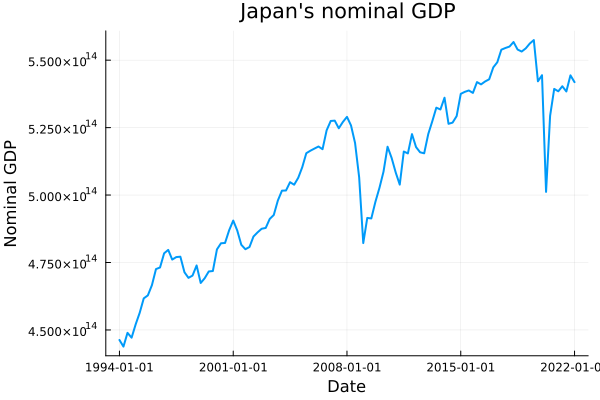

In [36]:
Plots.plot(fred.date,
    fred.gdp,
    xlabel     = "Date",
    ylabel     = "Nominal GDP",
    title      = "Japan's nominal GDP",
    #label      = [],
    #linecolor  = [:blue :red :green],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (600,400), 
    legend     = false#:bottomright,
)

#### We cannot easily capture the difference of growth rate of GDP from the time series plot at levels.
#### Now we utilize a useful approximation of $\log(1+g)  \approx g$ if $g$ is close to $0$. (see Maclaurin expansion of $\log(1+g)$)
#### A simple derivation yields...
#### $$\log(Y_{t+1}) = \log((1+g)Y_t)$$
#### $$= \log(1+g) + log(Y_t)$$
#### $$\approx g + log(Y_t)$$
#### Then, we get 
#### $$\log(Y_{t+1}) - log(Y_t) \approx g$$
#### The growth rate can be approximated by the difference of the natural logarithm of GDP ($Y$).

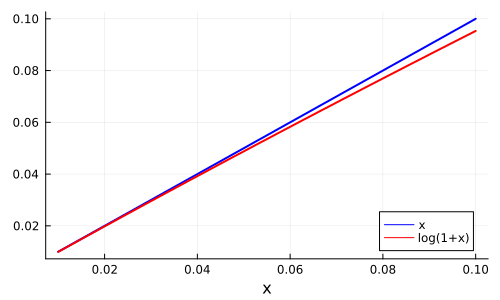

In [37]:
# Approximation with logarithms
x = range(0.01, 0.1, length = 20)
Plots.plot(x,
    [x log.(1 .+ x)],
    xlabel     = "x",
    #ylabel     = "",
    #title      = "",
    label      = ["x" "log(1+x)"],
    linecolor  = [:blue :red],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (500,300), 
    legend     = :bottomright,
)

In [38]:
log_gdp = log.(fred.gdp) # broadcasting the log over all the values of GDP

113-element Vector{Float64}:
 33.73196095139377
 33.726446950230624
 33.73788586199112
  ⋮
 33.93066313746657
 33.925999253061015

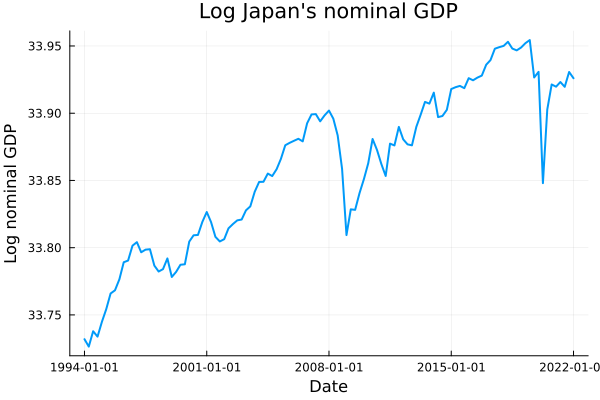

In [39]:
Plots.plot(fred.date,
    log.(fred.gdp),
    xlabel     = "Date",
    ylabel     = "Log nominal GDP",
    title      = "Log Japan's nominal GDP",
    #label      = [],
    #linecolor  = [:blue :red :green],
    linewidth  = 2,
    #linestyle  = [:solid :dash],
    size       = (600,400),
    legend     = false#:bottomright,
)

## Exercise 2

#### Plot the growth rate and log approximation of growth rate.

In [40]:
# solution


,date,gdp,inflation_rate,cpi,pre_gdp,growth,growth_approx
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,1994-04-01,4.43823e14,0.768693,97.8239,4.46277e14,-0.00549883,-0.005514
2,1994-07-01,4.48929e14,1.15849e-14,97.8544,4.43823e14,0.0115046,0.0114389
3,1994-10-01,4.47125e14,0.802232,98.3118,4.48929e14,-0.00401845,-0.00402655
4,1995-01-01,4.52096e14,0.209059,98.1139,4.47125e14,0.0111177,0.0110563
5,1995-04-01,4.5635e14,-0.0346741,97.8204,4.52096e14,0.00940951,0.00936551
6,1995-07-01,4.61698e14,0.0347826,97.8204,4.5635e14,0.0117191,0.0116509
7,1995-10-01,4.62803e14,-0.553633,97.7878,4.61698e14,0.00239334,0.00239048
8,1996-01-01,4.66602e14,-0.347705,97.82,4.62803e14,0.00820868,0.00817517
9,1996-04-01,4.72556e14,0.138744,97.787,4.66602e14,0.0127603,0.0126796


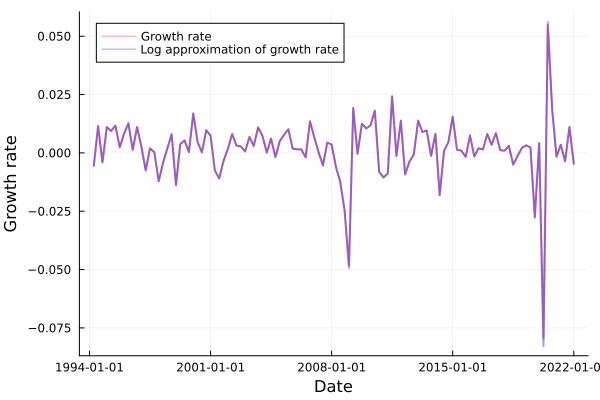

In [41]:
Plots.plot(pre.date,
    [pre.growth pre.growth_approx],
    xlabel     = "Date",
    ylabel     = "Growth rate",
    #title      = "",
    label      = ["Growth rate" "Log approximation of growth rate"],
    linecolor  = [:red :blue],
    linewidth  = 2,
    alpha      = [0.4 0.4],
    #linestyle  = [:solid :dash],
    size       = (600,400),
    legend     = :topleft,
)

#### Plot other variables in the dataset.

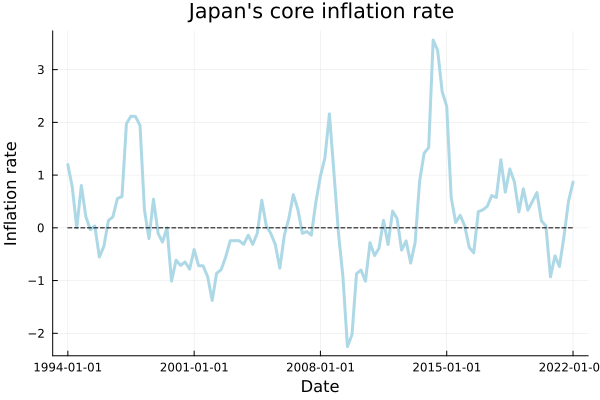

In [42]:
Plots.plot(fred.date,
    [fred.inflation_rate zeros(length(fred.inflation_rate))],
    xlabel     = "Date",
    ylabel     = "Inflation rate",
    title      = "Japan's core inflation rate",
    #label      = [],
    linecolor  = [:lightblue :black],
    linewidth  = [3 1], 
    linestyle  = [:solid :dash],
    size       = (600,400), 
    legend     = false#:bottomright,
)

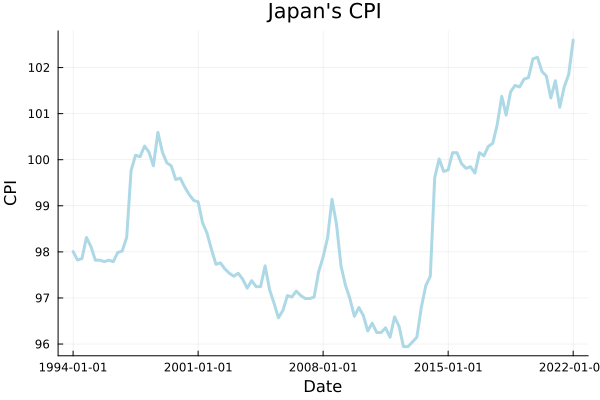

In [43]:
Plots.plot(fred.date,
    [fred.cpi],
    xlabel     = "Date",
    ylabel     = "CPI",
    title      = "Japan's CPI",
    #label      = [],
    linecolor  = [:lightblue :black],
    linewidth  = [3 1], 
    linestyle  = [:solid :dash],
    size       = (600,400), 
    legend     = false#:bottomright,
)

## Exercise 3

#### Calculate real GDP and compare it with nominal GDP. Although technically we should use the GDP deflator to calculate real GDP, in this exercise, we use the consumer price index instead.

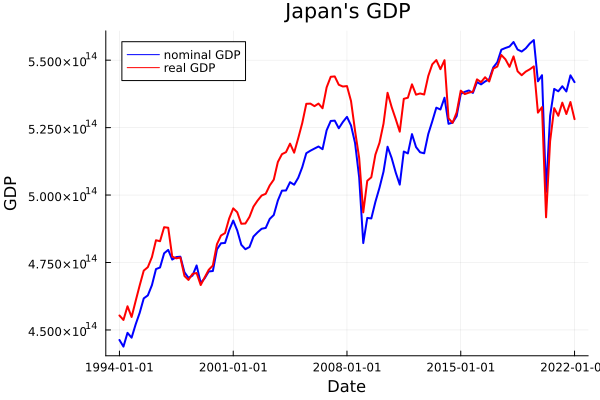

In [44]:
# solution


## 3. Hodrick-Prescott filter

#### This section provides an example of extracting the trend component of a macroeconomic time series data by using the Hodrick-Prescott filter.

#### Given a time series $y_t$ and a smoothing parameter $\lambda$, the filtered trend $\tau_t$ is defined by:
#### $$\min_{\tau}\left(\sum^{T}_{t=1}(y_{t}-\tau_{t})^2+\lambda\sum^{T-1}_{t=2}[(\tau_{t+1}-\tau_{t})-(\tau_{t}-\tau_{t-1})]^2\right)$$

The first-order conditions of this minimization problem can be expressed by the following linear system:

$$
\begin{bmatrix}
1+\lambda & -2\lambda &
\lambda & 0 & 0 & \cdots\\
-2\lambda & 1+5\lambda & -4\lambda & \lambda & 0 & \cdots\\
\lambda & -4\lambda & 1+6\lambda & -4\lambda & \lambda & \cdots\\
\vdots & \vdots & \vdots & \vdots & \vdots &\ddots \\
&&&&&\cdots& \lambda & -4\lambda & 1+6\lambda & -4\lambda & \lambda\\
&&&&&\cdots& 0 & \lambda & -4\lambda & 1+5\lambda & -2\lambda\\
&&&&&\cdots& 0 & 0 & \lambda & -2\lambda & 2\lambda
\end{bmatrix}
\begin{bmatrix}
\tau_{1}\\
\vdots\\
\vdots\\
\tau_{t}\\
\vdots\\
\vdots\\
\tau_{T}
\end{bmatrix}
=
\begin{bmatrix}
y_{1}\\
\vdots\\
\vdots\\
y_{t}\\
\vdots\\
\vdots\\
y_{T}
\end{bmatrix}
$$

Express this equation by

$$\Lambda \tau = Y$$
$$\tau = \Lambda^{-1} Y$$

where $\Lambda$ is a $T\times T$  matrix whose elements are functions of λ, $\tau$ is a $T\times 1$ vector which corresponds to filtered trend, and $Y$ is a $T\times 1$ vector which corresponds to the original time series.

In [45]:
function hodrick_prescott_filter(y, λ)
 
end

hodrick_prescott_filter (generic function with 1 method)

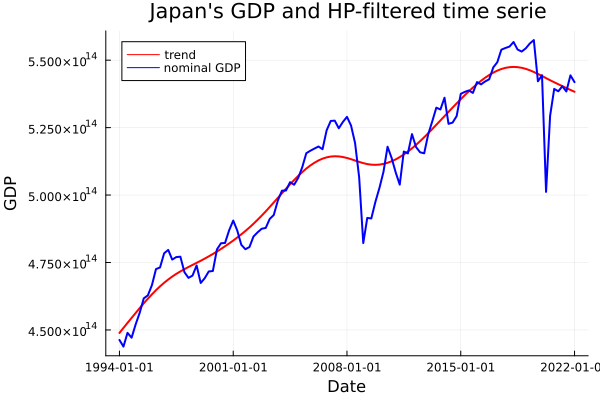

In [46]:
#By using Hodrick Prescott filter, you can decompose the original time series into trend and cycle. 
#The smoothing parameter λ is set to 1600 (typical for quarterly frequency).

trend, cycle = hodrick_prescott_filter(fred.gdp, 1600);
Plots.plot(fred.date,
    [trend fred.gdp],
    xlabel     = "Date",
    ylabel     = "GDP",
    title      = "Japan's GDP and HP-filtered time serie",
    label      = ["trend" "nominal GDP"],
    linecolor  = [:red :blue],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (600,400), 
    legend     = :topleft,
)

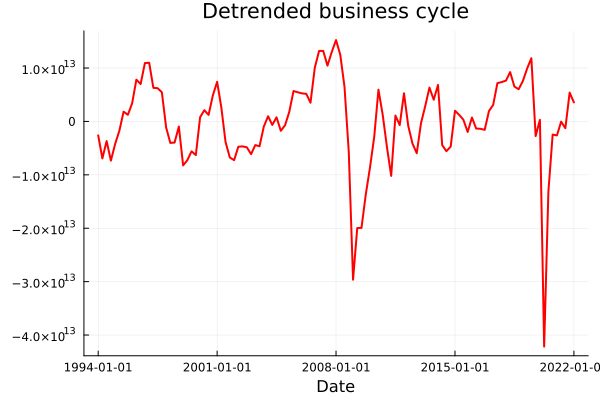

In [47]:
Plots.plot(fred.date,
    [cycle],
    xlabel     = "Date",
    #ylabel     = "GDP",
    title      = "Detrended business cycle",
    #label      = ["trend" "nominal GDP"],
    linecolor  = [:red :blue],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (600,400), 
    legend     = false,#:topleft,
)